##Reading Dataset from kaggle

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"xxxxx","key":"xx"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
!kaggle datasets download -d sohier/calcofi

calcofi.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip calcofi.zip

Archive:  calcofi.zip
replace bottle.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [5]:
import pandas as pd
import numpy as np
import json

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import r2_score, mean_absolute_error

In [6]:
bottle = pd.read_csv('bottle.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
bottle.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
bottle.shape

(864863, 74)

###Check Null Values

In [10]:
null_columns = (bottle.isnull().sum() / len(bottle)).sort_values(ascending=False)
null_columns

pH2                    0.999988
DIC Quality Comment    0.999936
pH1                    0.999903
DIC2                   0.999741
TA2                    0.999729
                         ...   
RecInd                 0.000000
Depthm                 0.000000
Depth_ID               0.000000
Sta_ID                 0.000000
Cst_Cnt                0.000000
Length: 74, dtype: float64

There are columns with almost 100% null values.

Removing all columns if >=50% of values are null 

In [11]:
drop_columns = null_columns[null_columns>=0.5].index

In [12]:
drop_columns

Index(['pH2', 'DIC Quality Comment', 'pH1', 'DIC2', 'TA2', 'DIC1', 'TA1',
       'C14A2p', 'C14A1p', 'C14As2', 'C14As1', 'IncTim', 'LightP', 'DarkAp',
       'MeanAp', 'DarkAs', 'MeanAs', 'T_qual', 'NH3uM', 'R_NH4', 'SThtaq',
       'S_qual', 'BtlNum', 'R_SAMP', 'O_qual', 'O2Satq', 'Phaeop', 'ChlorA',
       'R_PHAEO', 'R_CHLA', 'NO3uM', 'R_NO3', 'NO2uM', 'R_NO2', 'SiO3uM',
       'R_SIO3', 'PO4uM', 'R_PO4'],
      dtype='object')

In [13]:
df = bottle.drop(columns=drop_columns, axis=1)

In [14]:
df.shape

(864863, 36)

In [15]:
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,20


### Exploring categorical features

In [16]:
categorical_features = [i for i in df.columns if df[i].nunique() <= 5 ]
categorical_features

['RecInd',
 'T_prec',
 'S_prec',
 'P_qual',
 'Chlqua',
 'Phaqua',
 'PO4q',
 'SiO3qu',
 'NO2q',
 'NO3q',
 'NH3q',
 'C14A1q',
 'C14A2q',
 'DarkAq',
 'MeanAq']

Find the distribution of T_degC for each category.
Delete if the >90% of the value is in on category.:

In [17]:
remove_cat_columns = []
for i in categorical_features:
  x = df.groupby(i)['T_degC'].count()
  k = x.keys()
  v = x.values
  flag = True
  for c in range(len(k)):
    if(v[c]/v.sum() >= 0.9):
      flag = False
      break
  if(not(flag)):
    remove_cat_columns.append(i)
remove_cat_columns

['T_prec',
 'P_qual',
 'Chlqua',
 'Phaqua',
 'PO4q',
 'SiO3qu',
 'NO2q',
 'NO3q',
 'NH3q',
 'C14A1q',
 'C14A2q',
 'DarkAq',
 'MeanAq']

In [18]:
df.drop(columns=remove_cat_columns, inplace=True)

In [19]:
df.shape

(864863, 23)

In [20]:
df.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'RecInd',
       'S_prec', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_PRES'],
      dtype='object')

##Feature analysis and clean up

In [21]:
(df.isnull().sum() / len(df)).sort_values(ascending=False)

Oxy_µmol/Kg    0.235407
O2Sat          0.235400
R_O2Sat        0.229418
R_O2           0.195016
O2ml_L         0.195016
R_SIGMA        0.061115
R_SVA          0.061017
STheta         0.060922
R_SALINITY     0.054753
Salnty         0.054753
S_prec         0.054753
R_DYNHT        0.053947
R_POTEMP       0.053242
T_degC         0.012676
R_TEMP         0.012676
Cst_Cnt        0.000000
RecInd         0.000000
R_Depth        0.000000
Btl_Cnt        0.000000
Depthm         0.000000
Depth_ID       0.000000
Sta_ID         0.000000
R_PRES         0.000000
dtype: float64

Since T_dec has some null values we can use it for predictions

In [22]:
prediction_df = df[df['T_degC'].isnull()]

In [23]:
prediction_df.shape

(10963, 23)

In [24]:
df =  df[~df['T_degC'].isnull()]

In [25]:
df.shape

(853900, 23)

In [26]:
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,20


Removing duplicated columns in the dataset before splitting

Finding highly correlated columns

In [27]:
temp_df = df.dropna()
cor_matrix = temp_df.corr().abs()

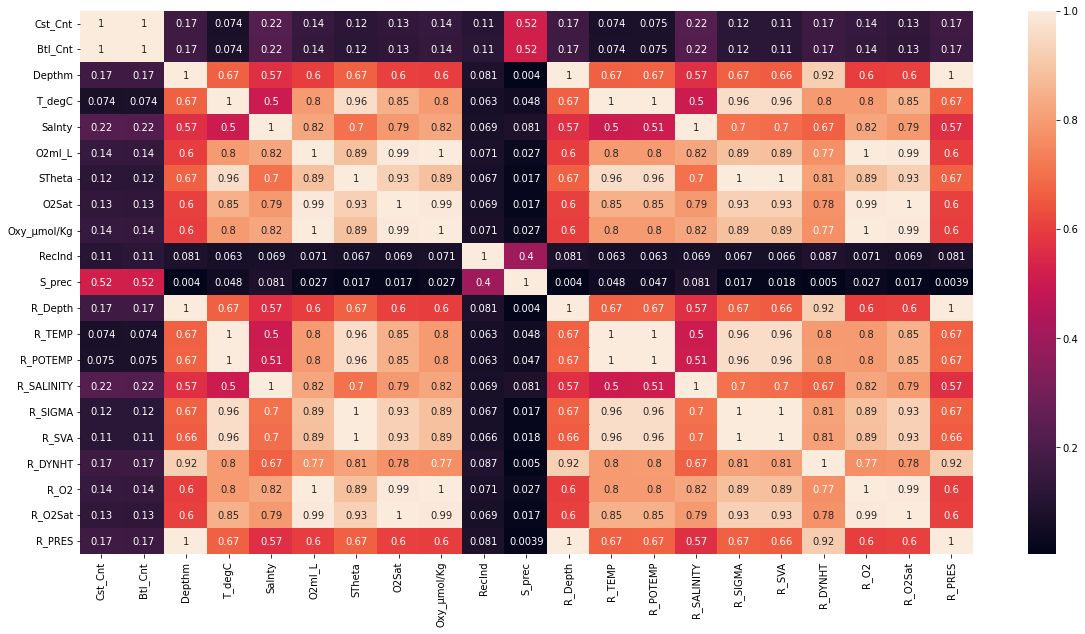

In [28]:
plt.figure(figsize = (20,10))
sns.heatmap(cor_matrix, annot = True)

In [29]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [30]:
upper_tri

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
Cst_Cnt,NaN,0.999344,0.168704,0.073941,0.223510,0.144777,0.116994,0.133793,0.144788,0.112796,...,0.168704,0.073950,0.074565,0.223568,0.116197,0.114916,0.166019,0.144799,0.133802,0.168319
Btl_Cnt,NaN,NaN,0.167673,0.074290,0.219979,0.142851,0.116031,0.132090,0.142865,0.113631,...,0.167673,0.074300,0.074906,0.220039,0.115216,0.113963,0.165528,0.142873,0.132100,0.167282
Depthm,NaN,NaN,NaN,0.668624,0.566891,0.597261,0.668570,0.602950,0.597326,0.081350,...,1.000000,0.668625,0.671528,0.566896,0.668514,0.660517,0.922600,0.597261,0.602951,0.999994
T_degC,NaN,NaN,NaN,NaN,0.504604,0.795378,0.964096,0.850988,0.795915,0.062913,...,0.668624,1.000000,0.999992,0.504599,0.964139,0.964631,0.797220,0.795379,0.850988,0.667216
Salnty,NaN,NaN,NaN,NaN,NaN,0.824888,0.700970,0.790515,0.824840,0.069256,...,0.566891,0.504606,0.506068,1.000000,0.700828,0.696364,0.666701,0.824889,0.790516,0.565651
O2ml_L,NaN,NaN,NaN,NaN,NaN,NaN,0.889966,0.993211,0.999999,0.071459,...,0.597261,0.795379,0.795929,0.824882,0.889964,0.886779,0.767949,0.999998,0.993211,0.595450
STheta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.929273,0.890441,0.067074,...,0.668570,0.964096,0.964319,0.700965,0.999995,0.999872,0.814417,0.889967,0.929274,0.667033
O2Sat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.993338,0.069317,...,0.602950,0.850989,0.851359,0.790509,0.929278,0.927121,0.776090,0.993210,1.000000,0.601183
Oxy_µmol/Kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071474,...,0.597326,0.795916,0.796464,0.824834,0.890439,0.887265,0.768046,0.999997,0.993338,0.595516
RecInd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.081350,0.062913,0.063099,0.069268,0.067025,0.066271,0.086888,0.071458,0.069319,0.081211


In [31]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print()
print(to_drop)


['Btl_Cnt', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_O2', 'R_O2Sat', 'R_PRES']


Dropping highly correlated feautures to simplify the model

In [32]:
df.drop(columns=to_drop, inplace=True)

In [33]:
df.shape

(853900, 10)

In [34]:
df.head()

,Cst_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,RecInd,S_prec,R_DYNHT
0,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,3,2.0,0.00
1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,3,2.0,0.01
2,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,7,3.0,0.02
3,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,3,2.0,0.04
4,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,7,3.0,0.04


##Regression Models
Training the dataset against different regression models to predict the temperature (T_degC) and calculating the accuracy of each models.

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = df.drop(columns=['T_degC'])
y = df['T_degC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
X.shape

(853900, 9)

In [38]:
y.shape

(853900,)

Adding a transformer layer to select features and also to handle missing values.

The missing values are handled handled after split and train to avoid data leak.

In [39]:
class ExperimentalTransformer(BaseEstimator, TransformerMixin):
  def __init__(self):
    #print('init')
    #return self
    a = 0
  def fit(self,X,y = None):
    #print('fit')
    return self
  def transform(self, X, y=None):
    X_ = X[['Cst_Cnt','Depthm','Salnty','O2ml_L','RecInd', 'S_prec', 'R_DYNHT']]
    X_ = X_.apply(lambda x: x.fillna(x.mean()),axis=0)
    return X_[['Cst_Cnt','Depthm','Salnty','O2ml_L','RecInd', 'S_prec', 'R_DYNHT']]

In [40]:
pipelines = {
    'rf':Pipeline(steps=[
                       ('experimental_trans', ExperimentalTransformer()), 
                       ('Scaler', StandardScaler()),   # this will trigger a call to __init__
                       ('random_forest', RandomForestRegressor(random_state=1000))]),    
    'gb':Pipeline(steps=[
                       ('experimental_trans', ExperimentalTransformer()), 
                       ('Scaler', StandardScaler()),   # this will trigger a call to __init__
                       ('GradientBoostingRegressor', GradientBoostingRegressor(random_state=1000))]),
    'ridge':Pipeline(steps=[
                       ('experimental_trans', ExperimentalTransformer()), 
                       ('Scaler', StandardScaler()),   # this will trigger a call to __init__
                       ('ridge', Ridge(random_state=1000))]),
    'lasso':Pipeline(steps=[
                       ('experimental_trans', ExperimentalTransformer()), 
                       ('Scaler', StandardScaler()),   # this will trigger a call to __init__
                       ('lasso', Lasso(random_state=1000))]),
    'enet':Pipeline(steps=[
                       ('experimental_trans', ExperimentalTransformer()), 
                       ('Scaler', StandardScaler()),   # this will trigger a call to __init__
                       ('enet', ElasticNet(random_state=1000))]),
    'XGBRegressor':Pipeline(steps= [('experimental_trans', ExperimentalTransformer()), 
                       ('Scaler', StandardScaler()),   # this will trigger a call to __init__
                       ('XGBRegressor', XGBRegressor(random_state=1000))]),
    #'SVR':Pipeline(steps= [('experimental_trans', ExperimentalTransformer()), 
    #                   ('Scaler', StandardScaler()),   # this will trigger a call to __init__
    #                   ('SVR', SVR(kernel = 'rbf'))]),
}

In [41]:
X_train.head()

,Cst_Cnt,Sta_ID,Depth_ID,Depthm,Salnty,O2ml_L,RecInd,S_prec,R_DYNHT
23474,763,092.0 058.0,19-4910CR-HY-288-1836-09200580-0030A-7,30,33.381,5.50,7,3.0,0.10
782839,31263,090.0 080.0,20-0610RR-MX-298-2345-09000800-0075A-7,75,33.252,5.49,7,3.0,0.27
192086,7432,126.7 045.0,19-5504HO-HY-099-2018-12670450-0500A-7,500,34.440,0.23,7,3.0,0.90
445708,17561,096.7 060.0,19-7201JD-CT-005-0945-09670600-0700A-5,700,34.420,NaN,5,2.0,1.12
766528,30661,080.0 070.0,20-0411RR-MX-321-0100-08000700-0000B-7,0,33.220,5.68,7,3.0,0.00


In [42]:
models = {}
for key,pipeline in pipelines.items():
  print(key)
  model = pipeline
  model.fit(X_train, y_train)
  models[key] = model

rf
gb
ridge
lasso
enet
XGBRegressor
[19:52:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [43]:
for algo,model in models.items():
    yhat = model.predict(X_test)
    print('{} scores - R2:{} MAE:{}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))

rf scores - R2:0.9747077589258518 MAE:0.4103345481805255
gb scores - R2:0.9132605442314367 MAE:0.8444772073466809
ridge scores - R2:0.7095234194583286 MAE:1.764543989383563
lasso scores - R2:0.6035046170913302 MAE:2.024533298775429
enet scores - R2:0.6051267019609397 MAE:2.046058235846539
XGBRegressor scores - R2:0.9128663044713781 MAE:0.8469265590573362
